In [2]:
import sys
import json
from pathlib import Path
from tqdm.notebook import tqdm
import requests


def find_git_project_root():
    cur_path = Path('.').resolve()
    for i in range(10):
        if (cur_path / '.git').exists():
            return cur_path
        cur_path = cur_path.parent
    raise Exception(f'Unable to find git project root')


def read_json(fpath):
    fpath.parent.mkdir(exist_ok=True, parents=True)

    if not fpath.exists():
        return None

    with fpath.open('r', encoding='utf-8') as f:
        return json.load(f)


repo_dir = find_git_project_root()
legacy_data_file = repo_dir / 'dataset' / 'legacy.210314.json'
legacy_data = read_json(legacy_data_file)

Ideas for statistics

* How much people spend money vs earn
* Price of work vs number of sold copies

----------

https://twitter.com/mattdesl/status/1371232168895258628

Nice stats here. I’m curious to see how the distribution looks more widely than just top earners—eg. how much users paid on average in fees, how much was earned on average, ratio of earned / spent, and how social follower counts factor in (rough “popularity” metric).

----------

https://twitter.com/mattdesl/status/1371527286869139460

Yes I think that’s true - though also a lot of us came to the platform via Mario, Joanie, Frederik, and then I suppose my own audience in turn, so I think it’s natural that it grew to be rather coder/generative-centric. Does not mean that’s all it can ever be, though. :)

I hope in time this (blockchain/decentralized) technology will flourish/grow into other fields of interest as well, and perhaps help bring these communities together in some ways (eg: just seeing Mario & James’ collaborations has been really nice).

----------

https://twitter.com/mtyka/status/1371166204862238722

Ran a quick analysis of all @hicetnunc2000 sales: so far about 1000 unique creators, ~5000 sales, total sales: ~35kꜩ (~140k). Most of that came from 10ꜩ and 100ꜩ sales. Pretty neat for just a few weeks and a small bottom- up-feel site . #Tezos #NFT $xtz
 
----------

https://twitter.com/quasimondo/status/1371380728672493569

Looks like the formula is:
number of twitter followers / 10 = tez earned

In [3]:
from collections import Counter

money_earned = Counter()
money_spent = Counter()

for token_id, token_data in legacy_data['by_token_id'].items():
    for event in token_data['events']:
        if event['type'] == 'buy':
            money_earned[token_data['author_addr']] += event['price']['seller_in']
            money_spent[event['buyer_addr']] += event['price']['buyer_out']

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

In [9]:
total_inside

8177.846388000002

In [10]:
total_in

26689.12705799999

In [11]:
total_out

25817.45265699998

1179 35


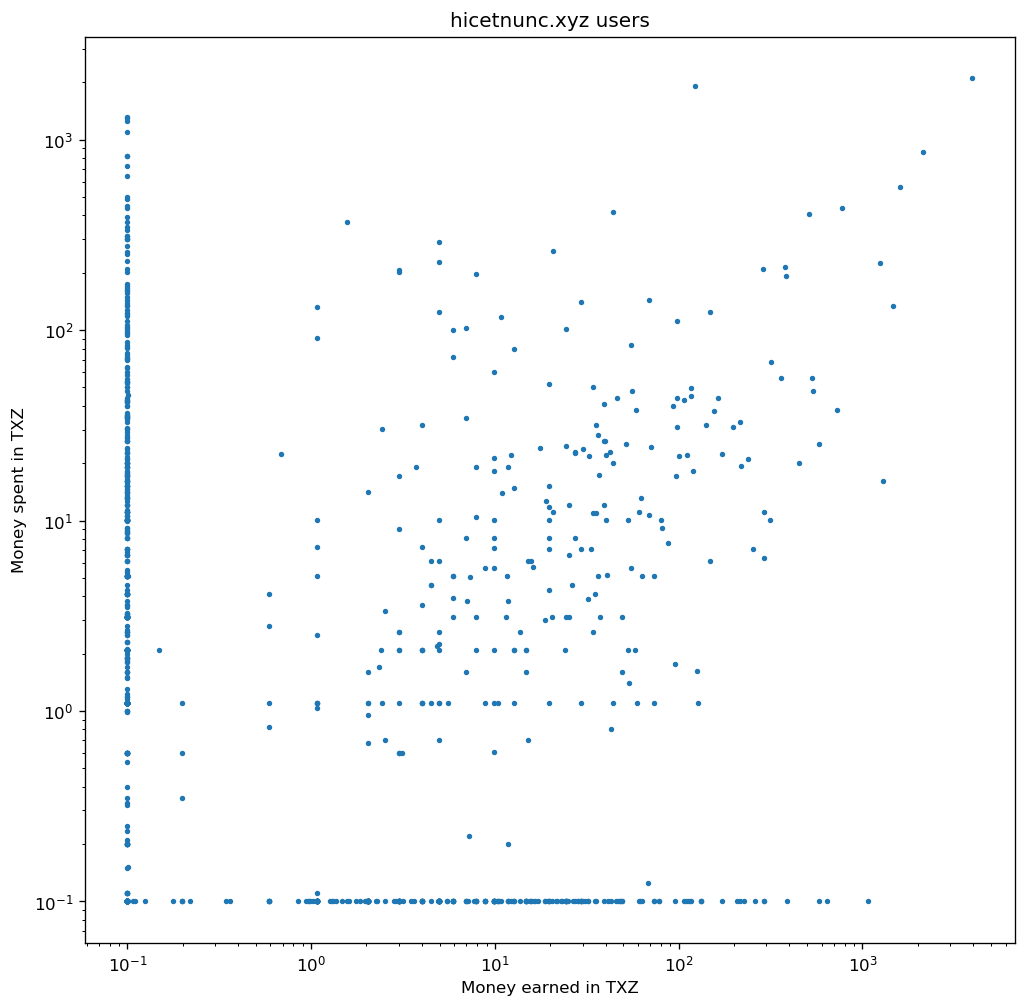

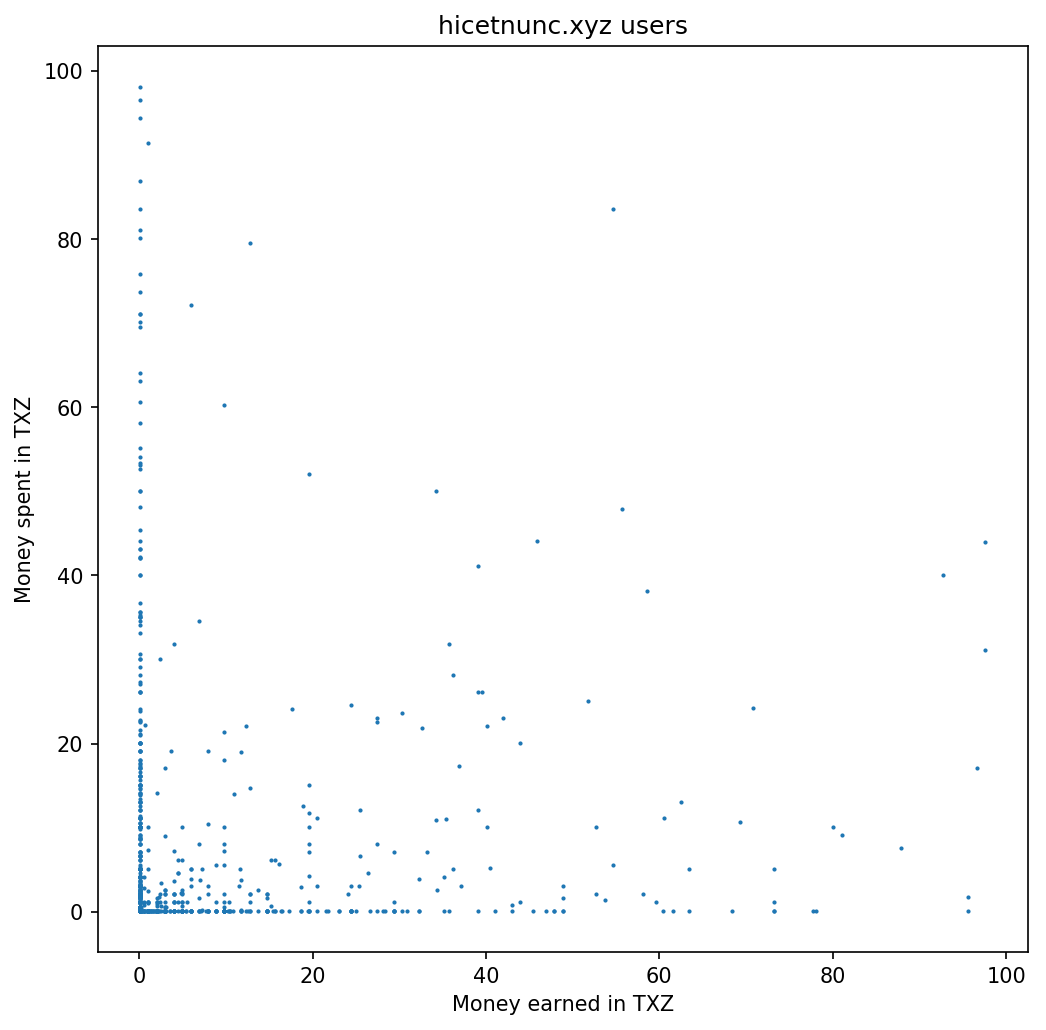

In [46]:
import math

x_vals = []
y_vals = []
s_vals = []

total_inside = 0
total_out = 0
total_in = 0

stats_01 = 0
stats_1 = 0

for addr in set(money_earned.keys()) | set(money_spent.keys()):
    cur_earned = money_earned[addr] / 1e6
    cur_spent = money_spent[addr] / 1e6

    if True:
        stats_01 += 1
        if cur_earned == 0 and cur_spent > 0:
            stats_1 += 1
    
    total_inside += min(cur_earned, cur_spent)
    total_out += cur_earned - min(cur_earned, cur_spent)
    total_in += cur_spent - min(cur_earned, cur_spent)
    if 0:
        x_vals.append(math.log(cur_earned + 0.1))
        y_vals.append(math.log(cur_spent + 0.1))
    else:
        x_vals.append(cur_earned + 0.1)
        y_vals.append(cur_spent + 0.1)
    s_vals.append(max(1, (cur_earned + cur_spent) ** 1 / 1e3))

print(stats_01, int(stats_1 / stats_01 * 100))

fig = plt.figure(figsize=(10, 10), dpi=120)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('hicetnunc.xyz users')
plt.xlabel('Money earned in TXZ')
plt.ylabel('Money spent in TXZ')
fig.patch.set_facecolor('white')
plt.scatter(x_vals, y_vals, s=5);

x_vals, y_vals, s_vals = zip(*[
    (x, y, s * 50)
    for x, y, s in zip(x_vals, y_vals, s_vals)
    if x < 100 and y < 100
])

fig = plt.figure(figsize=(8, 8), dpi=150)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('hicetnunc.xyz users')
plt.xlabel('Money earned in TXZ')
plt.ylabel('Money spent in TXZ')
fig.patch.set_facecolor('white')
plt.scatter(x_vals, y_vals, s=1);

In [3]:
legacy_data['by_token_id']['200']

{'token_id': 200,
 'author_addr': 'tz2K5UyvaMuNgiy5Zy8yVspTW6oXmchGvSey',
 'info': {'title': 'The Origin of all light',
  'description': "Tesla's Coil on Tezos bringing inspirational light at 100BPM",
  'tags': [],
  'artifact': {'url': 'ipfs://QmfUt6HqLSnShAiAMrA7BSrBHTJDw86f4rWqLRfehVYWyH',
   'mime': 'video/mp4'}},
 'events': [{'type': 'mint',
   'hash': 'oooWtpo7XEJGkYzRRHCjzaN3KH9mZPeiNGGa2Uy3AzgK3rB2rtN',
   'datetime': '2021-03-01T20:30:27Z',
   'count': 1,
   'royalties': 100},
  {'type': 'swap',
   'hash': 'opYTn2X6QN1FacSAtCm8J5PJrcW6mayA97i5zsSvtdwfQPMbYFW',
   'datetime': '2021-03-01T20:33:27Z',
   'price': 1000000,
   'count': 1},
  {'type': 'buy',
   'hash': 'ooNiuduYSiy3NKaGThdLtZWjD7pxF6EqTxX8QA2eXvnnivVzifC',
   'datetime': '2021-03-01T21:58:47Z',
   'buyer_addr': 'tz1Nu2Yn97X43BJyrBEcZ4kUNDw795NeHUWa',
   'seller_addr': 'KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9',
   'count': 1,
   'price': {'buyer_out': 1000000, 'seller_in': 975000, 'comission': 25000},
   'swap_id': 37}]